In [219]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [220]:
data=pd.read_csv("ex2\ex2data1.txt",names=["x1","x2","y"])

In [221]:
X=np.asarray(data[["x1","x2"]])
y=np.asarray(data["y"])

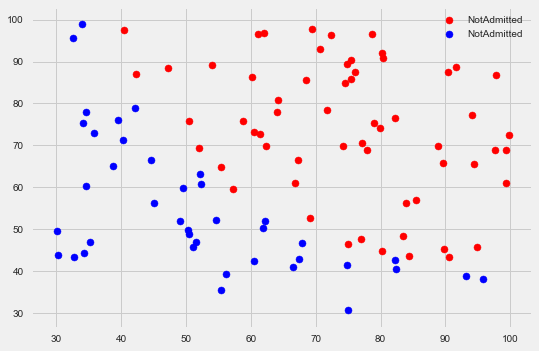

In [222]:
filt1=(data["y"]==1)
filt2=(data["y"]==0)
x1=data.loc[filt1,"x1"]
y1=data.loc[filt1,"x2"]
x2=data.loc[filt2,"x1"]
y2=data.loc[filt2,"x2"]
plt.style.use("fivethirtyeight")
plt.scatter(x1,y1,color="red",label="NotAdmitted")
plt.scatter(x2,y2,color="blue",label="NotAdmitted")
plt.legend()
plt.show()

In [223]:
def sigmoid(z):
    g=(1.0/(1+np.e**(-z)))
    return g

In [224]:
sigmoid(0)

0.5

In [225]:
def costFunction(theta,X,y):
    m,n=X.shape
    J=0
    grad=np.zeros(theta.shape)
    J=(1/m) * np.sum(-y*np.log(sigmoid(np.dot(X,theta)))-(1-y)*(np.log(1-sigmoid(np.dot(X,theta)))))
    grad=np.sum((sigmoid(np.dot(X,theta))-y)[:,None]*X,axis=0)/m
    return J,grad

In [226]:
m,n=X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [227]:
initial_theta=np.zeros(n+1)
cost,grad=costFunction(initial_theta,X,y)
cost,grad

(0.6931471805599453, array([ -0.1       , -12.00921659, -11.26284221]))

In [228]:
from scipy import optimize
options={"maxiter":400}
res=optimize.minimize(costFunction,initial_theta,(X,y),jac=True,method="TNC",options=options)
cost=res.fun
theta=res.x
cost,theta

(0.2034977015894747, array([-25.1613186 ,   0.20623159,   0.20147149]))

In [229]:
xx=[i for i in range(30,105)]
yy=[0 for i in range(30,105)]
for i in range(len(yy)):
    yy[i]=(-theta[0]-xx[i]*theta[2])/theta[1]

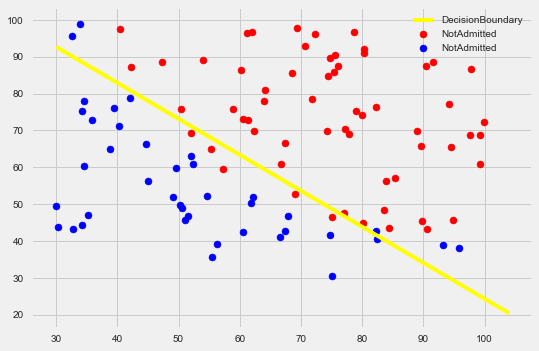

In [230]:
filt1=(data["y"]==1)
filt2=(data["y"]==0)
x1=data.loc[filt1,"x1"]
y1=data.loc[filt1,"x2"]
x2=data.loc[filt2,"x1"]
y2=data.loc[filt2,"x2"]
plt.style.use("fivethirtyeight")
plt.scatter(x1,y1,color="red",label="NotAdmitted")
plt.scatter(x2,y2,color="blue",label="NotAdmitted")
plt.plot(xx,yy,color="yellow",label="DecisionBoundary")
plt.legend()
plt.show()

In [231]:
def predict(theta,X):
    m=X.shape[0]
    p=np.zeros(m)
    l=np.round(sigmoid(np.dot(X,theta)))
    for i in range(len(l)):
        if(l[i]>=0.5):
            p[i]=1
    return p

In [232]:
prob=sigmoid(np.dot([1,45,85],theta))
prob

0.7762906230532407

In [233]:
p=predict(theta,X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))

Train Accuracy: 89.00 %


In [234]:
data2=pd.read_csv("ex2\ex2data2.txt",names=["x1","x2","y"])
X=data2[["x1","x2"]]
y=data2["y"]

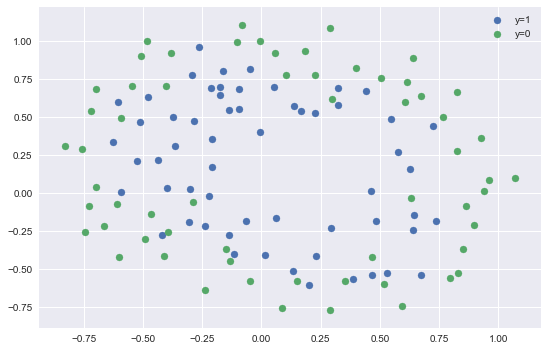

In [235]:
filt1=(data2["y"]==1)
filt2=(data2["y"]==0)
x1=data2.loc[filt1,"x1"]
y1=data2.loc[filt1,"x2"]
x2=data2.loc[filt2,"x1"]
y2=data2.loc[filt2,"x2"]
plt.style.use("seaborn")
plt.scatter(x1,y1,label="y=1")
plt.scatter(x2,y2,label="y=0")
plt.legend()
plt.show()

In [236]:
def mapFeatureVector(X1,X2):
    degree = 6
    output_feature_vec = np.ones(len(X1))[:,None]

    for i in range(1,7):
        for j in range(i+1):
            new_feature = np.array(X1**(i-j)*X2**j)[:,None]
            output_feature_vec = np.hstack((output_feature_vec,new_feature))
   
    return output_feature_vec

In [237]:
X=mapFeatureVector(X["x1"],X["x2"])

In [238]:
def costFunctionReg(theta,X,y,lambda_):
    m=len(y)
    """"J=0
    h=sigmoid(np.dot(X,theta))
    h=h.reshape(h.shape[0],1)
    J=(1/m)*np.sum(np.dot(y.T,np.log(h))-)"""
    J =(np.sum(-y*np.log(sigmoid(np.dot(X,theta)))-(1-y)*(np.log(1-sigmoid(np.dot(X,theta))))))/m+(lambda_/(2*m))*np.sum(theta**2)-(lambda_/(2*m))*theta[0]**2
    grad_0=np.sum((sigmoid(np.dot(X,theta))-y)[:,None]*X,axis=0)/m
    grad_reg=grad_0+(lambda_/m)*theta
    grad_reg[0]=grad_0[0]
    return J,grad_reg

In [239]:
initial_theta = np.zeros(X.shape[1])
lambda_ = 1
cost, grad = costFunctionReg(initial_theta, X, y, lambda_)
print(cost)
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))

0.6931471805599454
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]


In [240]:
test_theta=np.ones(X.shape[1])
lambda_=10
cost,grad=costFunctionReg(test_theta,X ,y,lambda_)
print(cost)
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))

3.1645093316150095
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


In [241]:
initial_theta=np.zeros(X.shape[1])
lambda_=1
options={"maxiter":100}
res=optimize.minimize(costFunctionReg,initial_theta,(X,y,lambda_),method="TNC",jac=True,options=options)
cost=res.fun
theta=res.x
p=predict(theta,X)
print(p)
print('Train Accuracy: %.1f %%' % (np.mean(p == y) * 100))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
Train Accuracy: 83.1 %


In [242]:
import ex2_utils
grader=ex2_utils.Grader()
grader[1]=sigmoid
grader[2]=costFunction
grader[3]=costFunction
grader[4]=predict
grader[5]=costFunctionReg
grader[6]=costFunctionReg
grader.grade()


Submitting Solutions | Programming Exercise logistic-regression

Use token from last successful submission (13vijay12@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Sigmoid Function |   5 /   5 | Nice work!
                   Logistic Regression Cost |  30 /  30 | Nice work!
               Logistic Regression Gradient |  30 /  30 | Nice work!
                                    Predict |   5 /   5 | Nice work!
       Regularized Logistic Regression Cost |  15 /  15 | Nice work!
   Regularized Logistic Regression Gradient |  15 /  15 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  

